### Problem Statement

You are a data scientist / AI engineer working on a binary classification problem. You have been provided with a dataset named **`"social_network_ads.csv"`**, which includes information about users' age, gender, estimated salary, and whether they purchased a product or not. The dataset comprises the following columns:

- `user_id:` The unique identifier for each user.
- `gender:` The gender of the user.
- `age:` The age of the user.
- `estimated_salary:` The estimated salary of the user.
- `purchased:` Whether the user purchased the product or not (0 for No, 1 for Yes).
  
Your task is to use this dataset to build and evaluate a logistic regression model to predict whether a user will purchase the product based on their age, gender and estimated salary. You will also evaluate the model's performance using precision, recall, and other classification metrics.

**Dataset credits:** Akram (https://www.kaggle.com/datasets/akram24/social-network-ads)

**Import Necessary Libraries**

In [7]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


### Task 1: Data Preparation and Exploration

1. Import the data from the `"social_network_ads.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of users' age and estimated salary using scatter plots.

In [2]:
# Step 1: Import the data from the "social_network_ads.csv" file and store it in a variable 'df'
df=pd.read_csv("/home/intellect/Documents/ML_Classification_1/social_network_ads.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Number of rows and columns:", df.shape)  

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

Number of rows and columns: (400, 5)


,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
df.isnull().sum()

user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

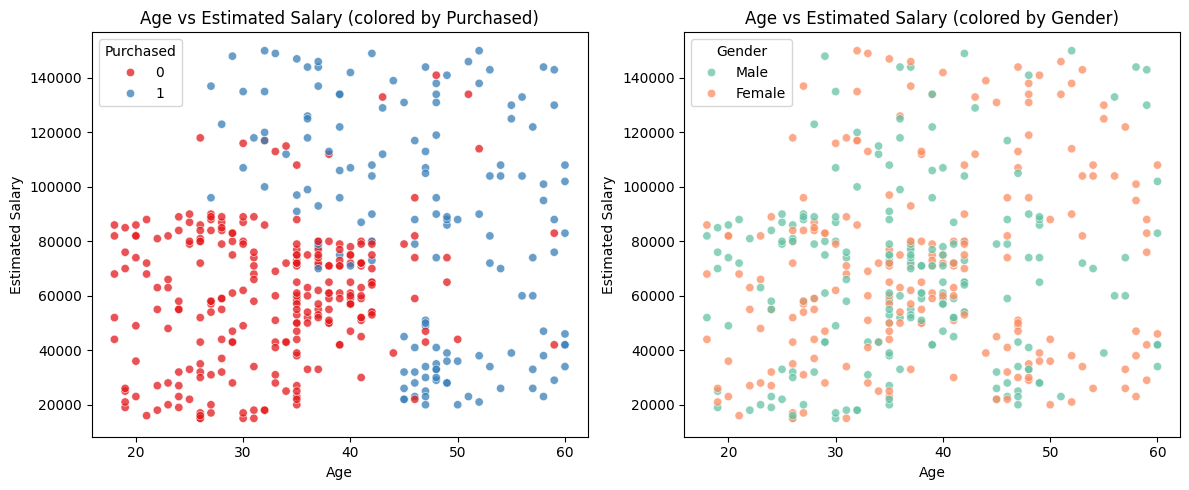

In [4]:
# Step 5: Visualize the distribution of users' age and estimated salary using scatter plots

# scatter plots: left -> colored by 'purchased', right -> colored by 'gender'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='estimated_salary', hue='purchased', palette='Set1', alpha=0.75)
plt.title('Age vs Estimated Salary (colored by Purchased)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Purchased')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='age', y='estimated_salary', hue='gender', palette='Set2', alpha=0.75)
plt.title('Age vs Estimated Salary (colored by Gender)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()


### Task 2: Model Training Using Logistic Regression

1. Encode the `gender` column (Male as 0 and Female as 1).
2. Select the features `(age, estimated_salary, gender)` and the target variable `(purchased)` for modeling.
3. Split the data into training and test sets with a test size of 30%.
4. Initialize and train a Logistic Regression model using the training data.
5. Print the model's coefficients and intercept.

In [9]:
# Step 1: Encode the gender column (Male as 0 and Female as 1)
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

# Step 2: Select the features and target variable for modeling
X = df[['age', 'estimated_salary', 'gender']]
y = df['purchased']

# Step 3: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Step 4: Initialize and train a Logistic Regression model using the training data
lr=LogisticRegression()
lr.fit(X_train, y_train)

# Step 5: Print the model's coefficients and intercept
print("Model Coefficients:", lr.coef_)
print("Model Intercept:", lr.intercept_)

Model Coefficients: [[2.24076710e-01 3.60746324e-05 3.09760521e-01]]
Model Intercept: [-12.40577501]


/home/intellect/Documents/ML_Classification_1/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Task 3: Model Evaluation

1. Make predictions on the test set using the trained model.
2. Evaluate the model using a classification report, including precision, recall, and accuracy metrics.

In [11]:
# Step 1: Make predictions on the test set using the trained model
y_pred=lr.predict(X_test)

# Step 2: Evaluate the model using a classification report, including precision, recall, and accuracy metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



In [12]:
import joblib
model_bundle = {
    "model": lr,         
    "label_encoder": le   
}

joblib.dump(model_bundle, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']